# Unsupervised Models
Use the wine data to conduct Principal Component Analysis. The URL is
https://archive.ics.uci.edu/ml/'machine-learning-databases/wine/wine.data

- Load the dataset. What are the features?
- Create a DataFrame of given wine dataset. Standardize the features.
- Split the dataset into training and test sets (30%).
- Use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine
covariance matrix. Print the eigenvalues.
- Compute and plot the individual explained variance and the cumulative explained
variance (range from 1 to 14). Using the NumPy cumsum function, calculate the
cumulative sum of explained variances, which you will then plot via Matplotlib's step
function. Explain the outcomes.
- Sort the eigenpairs by decreasing order of the eigenvalues. Make a list of (eigenvalue,
eigenvector) tuples. Sort the (eigenvalue, eigenvector) tuples from high to low. Print the
projection matrix W.
- Using the projection matrix, transform a sample x onto the PCA subspace (the
principal components 1 and 2). Transform the entire 124 x 13-dimensional training
dataset onto the two principal components by calculating the matrix dot product.
- Visualize the transformed Wine training set into a two-dimensional scatterplot.
- Method number 2. Import ListedColormap. Set up marker generator and color map. ---
- Plot the decision surface and plot the class samples.
- Import LogisticRegression and PCA. Visualize the decision regions (hint: X_train_pca,
y_train, classifier=lr).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine_data = load_wine()

In [3]:
df = pd.DataFrame(wine_data.data)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
df.columns = wine_data.feature_names
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
df.shape

(178, 13)

In [8]:
T_df = wine_data.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, T_df, test_size = 0.30, random_state = 7)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data_std = pd.DataFrame(sc.fit_transform(df), columns=wine_data.feature_names)
data_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [23]:
X_sctrain = sc.fit_transform(X_train)
X_sctest = sc.transform(X_test)

In [11]:
data_std.cov()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.005650,0.094930,0.212740,-0.311988,0.272328,0.290734,0.238153,-0.156810,0.137470,0.549451,-0.072153,0.072752,0.647357
malic_acid,0.094930,1.005650,0.164972,0.290130,-0.054883,-0.337061,-0.413329,0.294632,-0.221993,0.250392,-0.564467,-0.370794,-0.193095
ash,0.212740,0.164972,1.005650,0.445872,0.288206,0.129708,0.115727,0.187283,0.009706,0.260350,-0.075089,0.003933,0.224890
alcalinity_of_ash,-0.311988,0.290130,0.445872,1.005650,-0.083804,-0.322928,-0.353355,0.363966,-0.198442,0.018838,-0.275503,-0.278332,-0.443086
magnesium,0.272328,-0.054883,0.288206,-0.083804,1.005650,0.215613,0.196890,-0.257742,0.237776,0.201080,0.055711,0.066377,0.395573
total_phenols,0.290734,-0.337061,0.129708,-0.322928,0.215613,1.005650,0.869448,-0.452477,0.615873,-0.055448,0.436132,0.703904,0.500929
flavanoids,0.238153,-0.413329,0.115727,-0.353355,0.196890,0.869448,1.005650,-0.540939,0.656379,-0.173353,0.546549,0.791641,0.496985
nonflavanoid_phenols,-0.156810,0.294632,0.187283,0.363966,-0.257742,-0.452477,-0.540939,1.005650,-0.367912,0.139843,-0.264123,-0.506113,-0.313144
proanthocyanins,0.137470,-0.221993,0.009706,-0.198442,0.237776,0.615873,0.656379,-0.367912,1.005650,-0.025393,0.297214,0.522000,0.332283
color_intensity,0.549451,0.250392,0.260350,0.018838,0.201080,-0.055448,-0.173353,0.139843,-0.025393,1.005650,-0.524761,-0.431238,0.317886


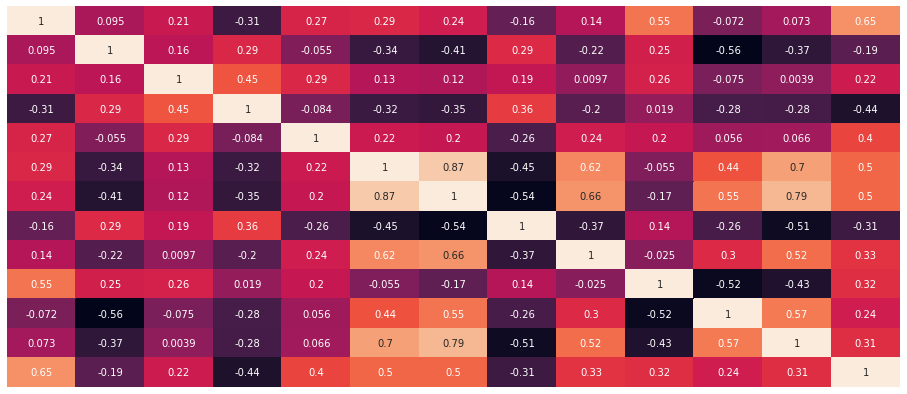

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 7))
sns.heatmap(data_std.cov(), annot=True, cbar=False, xticklabels=False, yticklabels=False)

### Use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix. Print the eigenvalues.

In [13]:
cov_matrix = data_std.cov() #np.cov(data_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print("Eigenvalues")
print(eigen_vals)

Eigenvalues
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


### Compute and plot the individual explained variance and the cumulative explained variance (range from 1 to 14). Using the NumPy cumsum function, calculate the cumulative sum of explained variances, which you will then plot via Matplotlib's step function. Explain the outcomes.

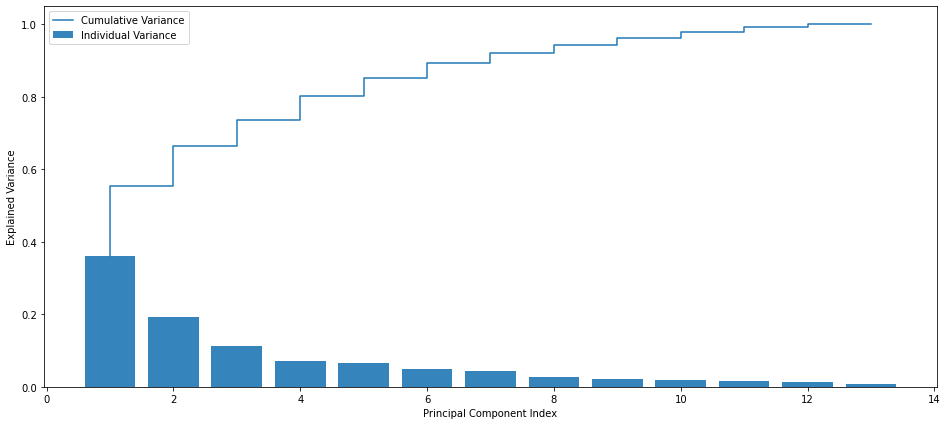

In [14]:
total = sum(eigen_vals)
variance = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cumulative_sum = np.cumsum(variance)

fig = plt.figure(figsize=(16, 7))
plt.bar(range(1,14), variance, alpha=0.9, label='Individual Variance')
plt.step(range(1,14), cumulative_sum, label='Cumulative Variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component Index')
plt.legend()
plt.show()

In [33]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w

array([[-0.1443294 , -0.48365155],
       [ 0.24518758, -0.22493093],
       [ 0.00205106, -0.31606881],
       [ 0.23932041,  0.0105905 ],
       [-0.14199204, -0.299634  ],
       [-0.39466085, -0.06503951],
       [-0.4229343 ,  0.00335981],
       [ 0.2985331 , -0.02877949],
       [-0.31342949, -0.03930172],
       [ 0.0886167 , -0.52999567],
       [-0.29671456,  0.27923515],
       [-0.37616741,  0.16449619],
       [-0.28675223, -0.36490283]])

In [34]:
X_trainpc = X_sctrain.dot(w)

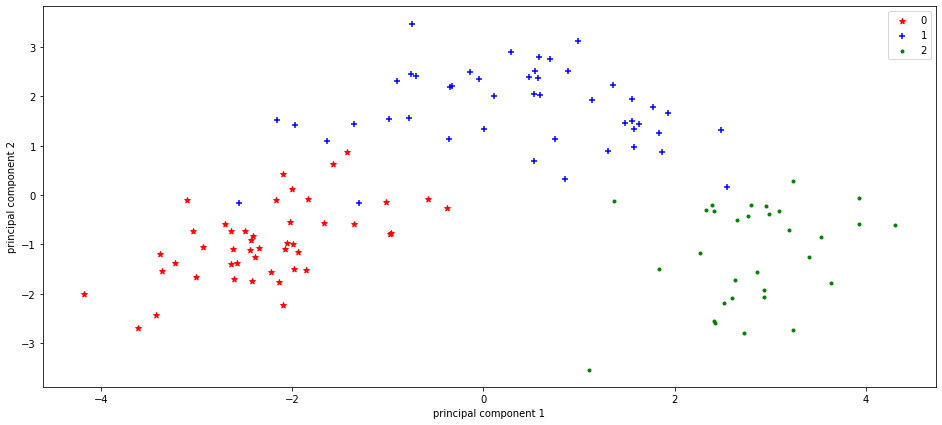

In [35]:
from matplotlib.colors import ListedColormap
colors = ['r','b', 'g']
markers = ['*', '+', '.']
fig = plt.figure(figsize=(16, 7))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_trainpc[y_train==l, 0], X_trainpc[y_train==l, 1], c=c, label=l, marker=m) 

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()

In [36]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

X_trainlr = pca.fit_transform(X_sctrain)
X_testlr = pca.transform(X_sctest)
lr.fit(X_trainlr, y_train)

LogisticRegression(solver='liblinear')

In [37]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  
    markers = ('+', '*', '.', '^', '*')
    colors = ('red','blue','green', 'yellow','orange', )
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x01, x02 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([x01.ravel(), x02.ravel()]).T)
    Z = Z.reshape(x01.shape)
    plt.contourf(x01, x02, Z, alpha=0.4, cmap=cmap)
    plt.xlim(x01.min(), x01.max())
    plt.ylim(x02.min(), x02.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)



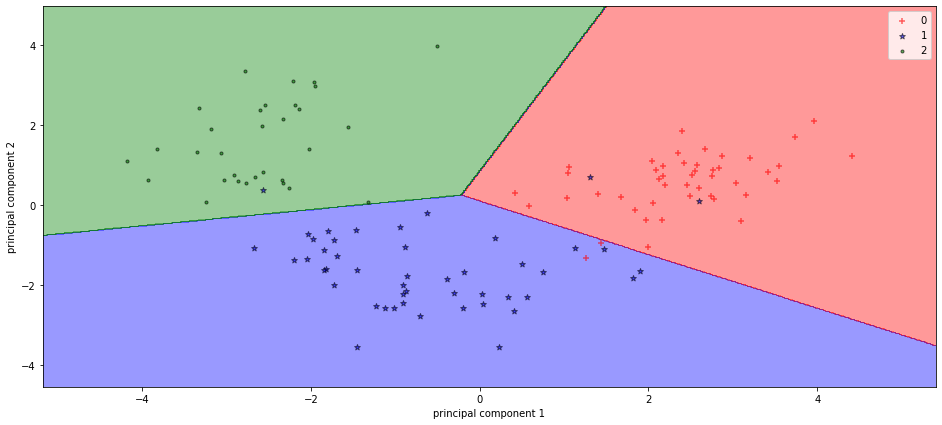

In [38]:
fig = plt.figure(figsize=(16, 7))
plot_decision_regions(X_trainlr, y_train, classifier=lr)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()